In [17]:
import numpy as np
import pandas as pd
import scipy.io
import os
from scipy.signal import savgol_filter
from dtaidistance import dtw
import seaborn as sns
from sklearn import preprocessing
from numpy import inf
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.spatial.distance as ssd

In [18]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\\'

In [19]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [20]:
Ratings = pd.read_excel(load_path + 'Ratings.xlsx')

In [21]:
presentations_ids = Features['presentation_id'].values
presentations_ids.shape

(603,)

In [22]:
indices_dict = []
series = []

for i, presentation_id in enumerate(presentations_ids):
    print(presentation_id, end='\r')
    
    indices_dict.append(presentation_id)
    
    clip_id = presentation_id % 100
    user_id = int(presentation_id / 100)
    
    #data_path = './../../ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    data_path = 'D:/EECE499/Raw/MyECGFunc/ASCERTAIN_Raw/GSRData/Movie_P' + str(user_id).zfill(2) + '/GSR_Clip' + str(clip_id) + '.mat'
    
    if os.path.isfile(data_path):
        
        signal = scipy.io.loadmat(data_path)
        resistance = signal['Data_GSR'][:,4]
        
        resistance = savgol_filter(resistance, 501, 3)
        series.append(resistance)  

In [23]:
dist_matrix = np.load('dist_matrix.npy')

In [24]:
dist_matrix

array([[             inf,  685999.80847838,    6072.28759009, ...,
        3783948.6750768 , 4228522.04475941, 4413644.28624652],
       [             inf,              inf,  680700.33258028, ...,
        2984104.29115066, 3320866.42893749, 3443009.31890644],
       [             inf,              inf,              inf, ...,
        3278822.99052139, 4222344.78294347, 3741613.45647243],
       ...,
       [             inf,              inf,              inf, ...,
                     inf,  705816.71935999,  976350.51213576],
       [             inf,              inf,              inf, ...,
                     inf,              inf,  104844.25074745],
       [             inf,              inf,              inf, ...,
                     inf,              inf,              inf]])

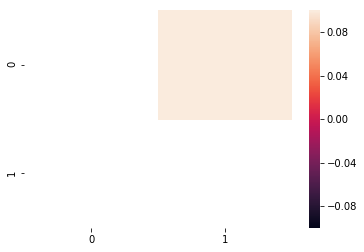

In [25]:
sns.heatmap(dist_matrix[:2,:2])

In [26]:
#dist_matrix[dist_matrix == inf] = 0.0

In [27]:
#sns.heatmap(dist_matrix)

In [28]:
#dist_matrix

In [35]:
dist_matrix.shape

(100, 100)

In [36]:
i_lower = np.tril_indices(dist_matrix.shape[0], -1)
dist_matrix[i_lower] = dist_matrix.T[i_lower]

In [41]:
np.fill_diagonal(dist_matrix, 0)

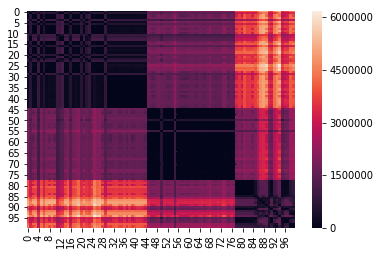

In [42]:
sns.heatmap(dist_matrix)

In [43]:
dist_matrix

array([[      0.        ,  685999.80847838,    6072.28759009, ...,
        3783948.6750768 , 4228522.04475941, 4413644.28624652],
       [ 685999.80847838,       0.        ,  680700.33258028, ...,
        2984104.29115066, 3320866.42893749, 3443009.31890644],
       [   6072.28759009,  680700.33258028,       0.        , ...,
        3278822.99052139, 4222344.78294347, 3741613.45647243],
       ...,
       [3783948.6750768 , 2984104.29115066, 3278822.99052139, ...,
              0.        ,  705816.71935999,  976350.51213576],
       [4228522.04475941, 3320866.42893749, 4222344.78294347, ...,
         705816.71935999,       0.        ,  104844.25074745],
       [4413644.28624652, 3443009.31890644, 3741613.45647243, ...,
         976350.51213576,  104844.25074745,       0.        ]])

In [44]:
dist_array = ssd.squareform(dist_matrix)

In [45]:
Z = linkage(dist_array, method='ward')

In [ ]:
#dist_array[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j
#dist_array[{4950}-{n-i choose 2} + (j-i-1)] is the distance between points i and j

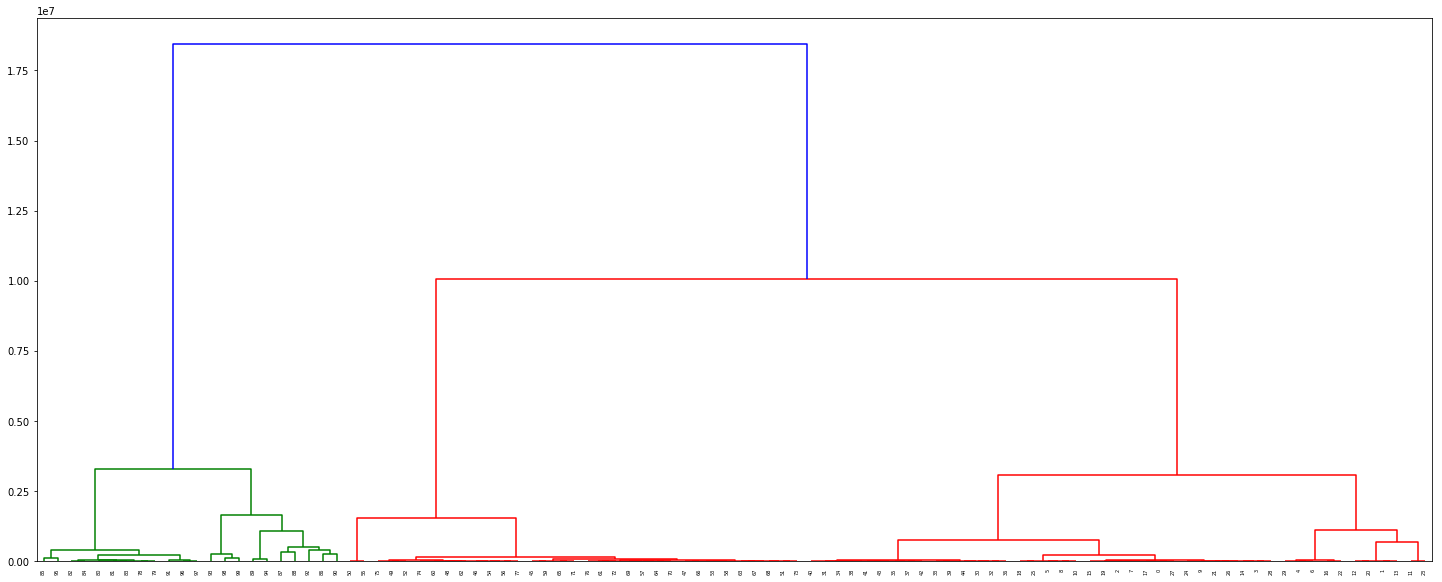

In [46]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.savefig('dendrogram_no_penalty.png', format='png', dpi=1000)
plt.show()

In [47]:
Z[1,0]

32.0

In [48]:
Z[1,1]

36.0

In [49]:
Z

array([[3.70000000e+01, 4.20000000e+01, 4.14802828e+02, 2.00000000e+00],
       [3.20000000e+01, 3.60000000e+01, 5.08117908e+02, 2.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 5.59728895e+02, 2.00000000e+00],
       [3.50000000e+01, 1.00000000e+02, 5.90577059e+02, 3.00000000e+00],
       [3.40000000e+01, 3.80000000e+01, 6.32345963e+02, 2.00000000e+00],
       [3.10000000e+01, 1.04000000e+02, 7.43659741e+02, 3.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.10451880e+03, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.25717191e+03, 2.00000000e+00],
       [0.00000000e+00, 2.70000000e+01, 1.55866213e+03, 2.00000000e+00],
       [3.00000000e+01, 1.01000000e+02, 1.72883097e+03, 3.00000000e+00],
       [1.02000000e+02, 1.03000000e+02, 1.74805089e+03, 5.00000000e+00],
       [5.60000000e+01, 7.70000000e+01, 2.15601472e+03, 2.00000000e+00],
       [1.20000000e+01, 2.00000000e+01, 2.16364792e+03, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 2.19150866e

In [50]:
dist_matrix_penalty = np.load('dist_matrix_penalty.npy')

In [54]:
i_lower = np.tril_indices(dist_matrix_penalty.shape[0], -1)
dist_matrix_penalty[i_lower] = dist_matrix_penalty.T[i_lower]

In [55]:
np.fill_diagonal(dist_matrix_penalty, 0)

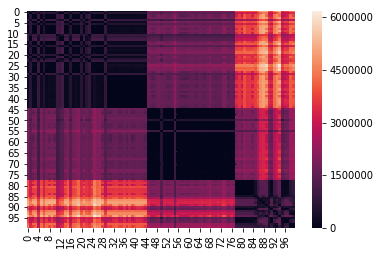

In [56]:
sns.heatmap(dist_matrix_penalty)

In [57]:
dist_array_penalty = ssd.squareform(dist_matrix_penalty)

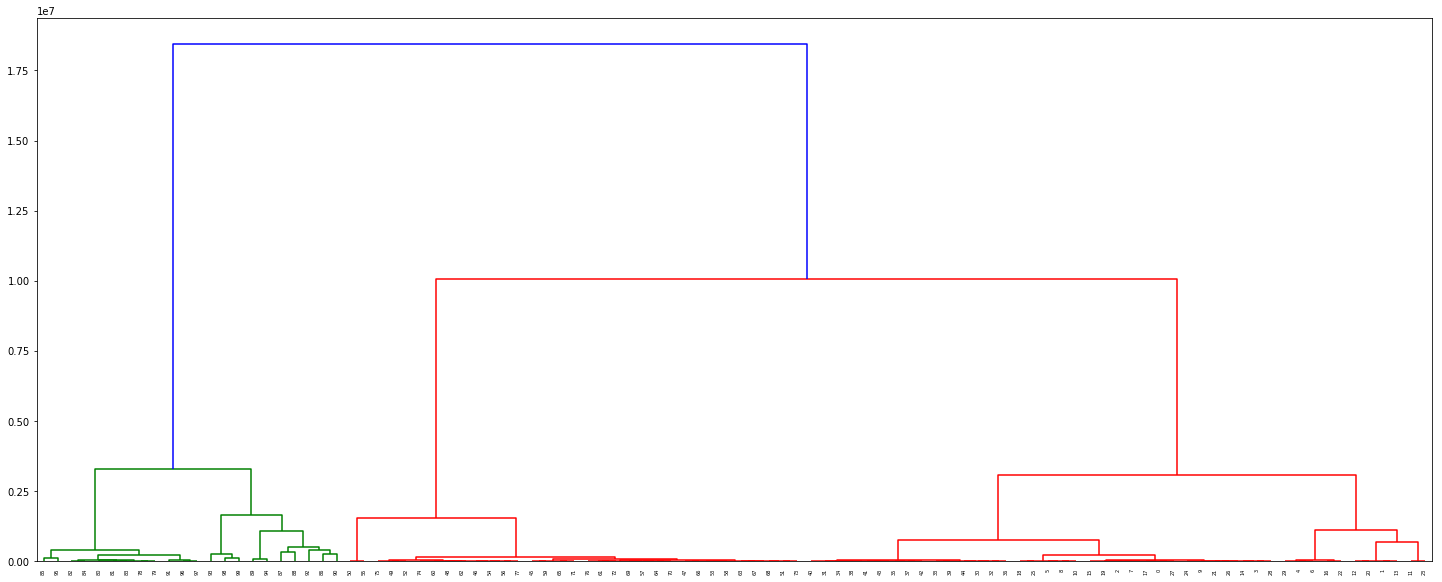

In [58]:
Z_2 = linkage(dist_array_penalty, method='ward')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_2)
plt.savefig('dendrogram_penalty.png', format='png', dpi=1000)
plt.show()

In [59]:
Z

array([[3.70000000e+01, 4.20000000e+01, 4.14802828e+02, 2.00000000e+00],
       [3.20000000e+01, 3.60000000e+01, 5.08117908e+02, 2.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 5.59728895e+02, 2.00000000e+00],
       [3.50000000e+01, 1.00000000e+02, 5.90577059e+02, 3.00000000e+00],
       [3.40000000e+01, 3.80000000e+01, 6.32345963e+02, 2.00000000e+00],
       [3.10000000e+01, 1.04000000e+02, 7.43659741e+02, 3.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.10451880e+03, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.25717191e+03, 2.00000000e+00],
       [0.00000000e+00, 2.70000000e+01, 1.55866213e+03, 2.00000000e+00],
       [3.00000000e+01, 1.01000000e+02, 1.72883097e+03, 3.00000000e+00],
       [1.02000000e+02, 1.03000000e+02, 1.74805089e+03, 5.00000000e+00],
       [5.60000000e+01, 7.70000000e+01, 2.15601472e+03, 2.00000000e+00],
       [1.20000000e+01, 2.00000000e+01, 2.16364792e+03, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 2.19150866e

In [60]:
Z_2

array([[3.70000000e+01, 4.20000000e+01, 4.29467248e+02, 2.00000000e+00],
       [3.20000000e+01, 3.60000000e+01, 5.26611553e+02, 2.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 5.72229312e+02, 2.00000000e+00],
       [3.50000000e+01, 1.00000000e+02, 6.04569001e+02, 3.00000000e+00],
       [3.40000000e+01, 3.80000000e+01, 6.43870010e+02, 2.00000000e+00],
       [3.10000000e+01, 1.04000000e+02, 7.51886427e+02, 3.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.10953173e+03, 2.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.25990347e+03, 2.00000000e+00],
       [0.00000000e+00, 2.70000000e+01, 1.56183117e+03, 2.00000000e+00],
       [3.00000000e+01, 1.01000000e+02, 1.73096526e+03, 3.00000000e+00],
       [1.02000000e+02, 1.03000000e+02, 1.75181221e+03, 5.00000000e+00],
       [5.60000000e+01, 7.70000000e+01, 2.15821839e+03, 2.00000000e+00],
       [1.20000000e+01, 2.00000000e+01, 2.16558762e+03, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 2.19392103e